In [79]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.regularizers import l2
from IPython.display import display
from ipywidgets import interactive
import statsmodels.api as sm
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.ticker as mticker


filename = "C:\\Users\\simon\\OneDrive\\Escritorio\\Coding_dojo\\Datos\\Datos personales\\Metro estudio.xlsx"

df = pd.read_excel(filename)

In [80]:
df

,Mes y año,Total Red,Pasajeros comunes,Escolares total,Escolares Pagados,Escolares Básicos (Gratuitos),Total Linea 1,Pasajeros comunes 1,Escolares Total 1,Escolares Pagados 1,...,Total Linea 6,Pasajeros comunes 6,Escolares Total 6,Escolares Pagados 6,Escolares Básicos (Gratuitos) 6,Total Linea 3,Pasajeros comunes 3,Escolares Total 3,Escolares Pagados 3,Escolares Básicos (Gratuitos) 3
0,2010-01-01,45448230,35876494,9571736,8995586,576150,19096868,15320325,3776543,3589795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-01,35380504,30168805,5211699,5074189,137510,14672104,12648074,2024030,1978204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-01,50872123,38427621,12444502,11469330,975172,21182839,16178579,5004260,4687592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-01,55724226,39097224,16627002,15312872,1314130,23579130,16637812,6941318,6495465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-05-01,55332802,38358934,16973868,15631219,1342649,23094136,16110826,6983310,6535747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2023-02-01,34606344,25317083,9289261,7803023,1486238,11920992,9006388,2914604,2478510,...,2186258.0,1620941.0,565317.0,476606.0,88711.0,3636090.0,2760529.0,875561.0,740709.0,134852.0
158,2023-03-01,53577205,35845167,17732038,15434639,2297399,18615401,12722544,5892857,5230031,...,3486077.0,2350314.0,1135763.0,995991.0,139772.0,5475829.0,3826612.0,1649217.0,1428683.0,220534.0
159,2023-04-01,49637585,31990585,17647000,15538188,2108812,17221273,11329150,5892123,5278205,...,3166250.0,2044719.0,1121531.0,994165.0,127366.0,5139546.0,3459242.0,1680304.0,1476819.0,203485.0
160,2023-05-01,55181712,35186554,19995158,17463217,2531941,19190204,12469642,6720562,5983205,...,3515493.0,2253503.0,1261990.0,1109160.0,152830.0,5651534.0,3787320.0,1864214.0,1623931.0,240283.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Mes y año                         162 non-null    datetime64[ns]
 1   Total Red                         162 non-null    int64         
 2   Pasajeros comunes                 162 non-null    int64         
 3   Escolares total                   162 non-null    int64         
 4   Escolares Pagados                 162 non-null    int64         
 5   Escolares Básicos (Gratuitos)     162 non-null    int64         
 6   Total Linea 1                     162 non-null    int64         
 7   Pasajeros comunes 1               162 non-null    int64         
 8   Escolares Total  1                162 non-null    int64         
 9   Escolares Pagados 1               162 non-null    int64         
 10  Escolares Básicos (Gratuitos) 1   162 non-null    

## información relevante

1. Escolares pagados incluye tarifa adulto mayor
2. A contar del 2017 se opera la línea 6 en Sntg
3. A contar del 2019 se opera la línea 3 en Sntg 
4. En octubre 2019 comienza estallido social en Chile 
5. En marzo del 2020 comienza COVID - 19 en Chile


In [82]:
#Seleccion de columnas para estudiar

df_totales = df[["Mes y año", "Total Red", "Pasajeros comunes", "Escolares total", "Escolares Pagados", "Escolares Básicos (Gratuitos)"]]
df_totales

,Mes y año,Total Red,Pasajeros comunes,Escolares total,Escolares Pagados,Escolares Básicos (Gratuitos)
0,2010-01-01,45448230,35876494,9571736,8995586,576150
1,2010-02-01,35380504,30168805,5211699,5074189,137510
2,2010-03-01,50872123,38427621,12444502,11469330,975172
3,2010-04-01,55724226,39097224,16627002,15312872,1314130
4,2010-05-01,55332802,38358934,16973868,15631219,1342649
...,...,...,...,...,...,...
157,2023-02-01,34606344,25317083,9289261,7803023,1486238
158,2023-03-01,53577205,35845167,17732038,15434639,2297399
159,2023-04-01,49637585,31990585,17647000,15538188,2108812
160,2023-05-01,55181712,35186554,19995158,17463217,2531941


In [83]:
df_totales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Mes y año                      162 non-null    datetime64[ns]
 1   Total Red                      162 non-null    int64         
 2   Pasajeros comunes              162 non-null    int64         
 3   Escolares total                162 non-null    int64         
 4   Escolares Pagados              162 non-null    int64         
 5   Escolares Básicos (Gratuitos)  162 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 7.7 KB


## Gráficos exploratorios de personas que usan el metro por año

### Gráfico N°1 Total de pasajeros por año

C:\Users\simon\AppData\Local\Temp\ipykernel_4532\4073395318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Año"] = df_totales["Mes y año"].dt.year


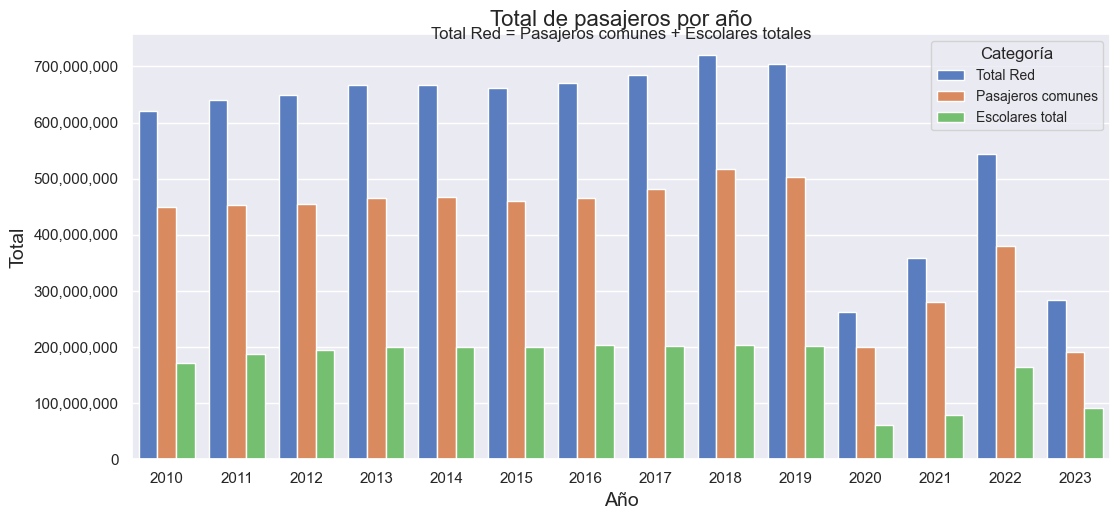

In [84]:
# Paso 1: Extraer el año de la columna de fechas
df_totales["Año"] = df_totales["Mes y año"].dt.year

# Paso 2: Calcular la suma total de cada categoría por año
totales_por_año = df_totales.groupby("Año")[["Total Red", "Pasajeros comunes", "Escolares total"]].sum().reset_index()

# Paso 3: Convertir las columnas de totales en una sola columna "Total" con su categoría correspondiente
totales_melted = totales_por_año.melt(id_vars=["Año"], var_name="Categoría", value_name="Total")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
ax = sns.barplot(data=totales_melted, x="Año", y="Total", hue="Categoría", palette="muted")

# Personalización del gráfico
plt.title("Total de pasajeros por año", fontsize=16)  # Ajustar el tamaño del título
plt.xlabel("Año", fontsize=14)  # Ajustar el tamaño del nombre del eje x
plt.ylabel("Total", fontsize=14)  # Ajustar el tamaño del nombre del eje y

# Ajustar la leyenda
plt.legend(title="Categoría", title_fontsize=12, fontsize=10)  # Ajustar el tamaño de la leyenda

# Ajustar el eje Y para mostrar los números con punto
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Agregar subtítulo debajo del título con mayor espacio (pad)
plt.text(0.5, 1.0, 'Total Red = Pasajeros comunes + Escolares totales', fontsize=12, ha='center', va='center', transform=ax.transAxes)

# Ajustar el espacio entre el título y la gráfica
plt.tight_layout(pad=3.0)

# Mostrar el gráfico
plt.show()


En el gráfico presentado, podemos observar claramente una tendencia al alza en el número de pasajeros desde el año 2015 hasta el 2019. Sin embargo, se observan dos eventos importantes que afectaron significativamente la serie de tiempo. El primero ocurrió durante el año 2019 debido al estallido social, lo que produjo una disminución abrupta en la cantidad de pasajeros. Luego, en el año 2020, la pandemia de COVID-19 provocó una caída aún más pronunciada en el número de pasajeros.

Con el objetivo de construir un modelo de aprendizaje automático (ML) que pueda realizar predicciones precisas, se ha tomado la decisión de dividir los datos en dos conjuntos: uno para entrenar el modelo (Train) y otro para evaluar su rendimiento (Test). Para evitar que los grandes cambios causados por factores externos afecten la precisión del modelo, se ha seleccionado el año 2018 como el límite entre el conjunto de entrenamiento y prueba. De esta manera, el modelo se entrenará con datos que no incluyan el impacto del estallido social y la pandemia, y luego será evaluado con los datos del año 2019 para medir su capacidad de generalización en condiciones similares a las del futuro.

Este enfoque ayudará a asegurar que el modelo tenga en cuenta la tendencia al alza observada hasta el 2018 y pueda realizar predicciones más confiables y estables en ausencia de eventos extraordinarios que distorsionen la serie de tiempo.


In the presented graph, we can clearly observe an upward trend in the number of passengers from the year 2015 until 2019. However, there are two significant events that had a major impact on the time series. The first event occurred in 2019 due to the social unrest, resulting in a sharp decline in passenger numbers. Subsequently, in 2020, the COVID-19 pandemic caused an even more pronounced drop in passenger traffic.

To build a reliable machine learning (ML) model capable of making accurate predictions, the data has been divided into two sets: one for model training (Train) and the other for evaluating its performance (Test). The decision to split the data at the year 2018 aims to avoid the influence of large changes caused by external factors on the model's accuracy. By training the model on data up to 2018, excluding the impact of social unrest and the pandemic, it can be better prepared to make predictions in conditions similar to the future.

This approach ensures that the model considers the upward trend observed until 2018 and can make more dependable and stable predictions without being affected by extraordinary events that could distort the time series.

By using this strategy, we aim to improve the model's ability to generalize and make predictions beyond the period covered by the training data, thus providing valuable insights for future planning and decision-making.

### Gráfico N°2 Total de pasajeros escolares por año

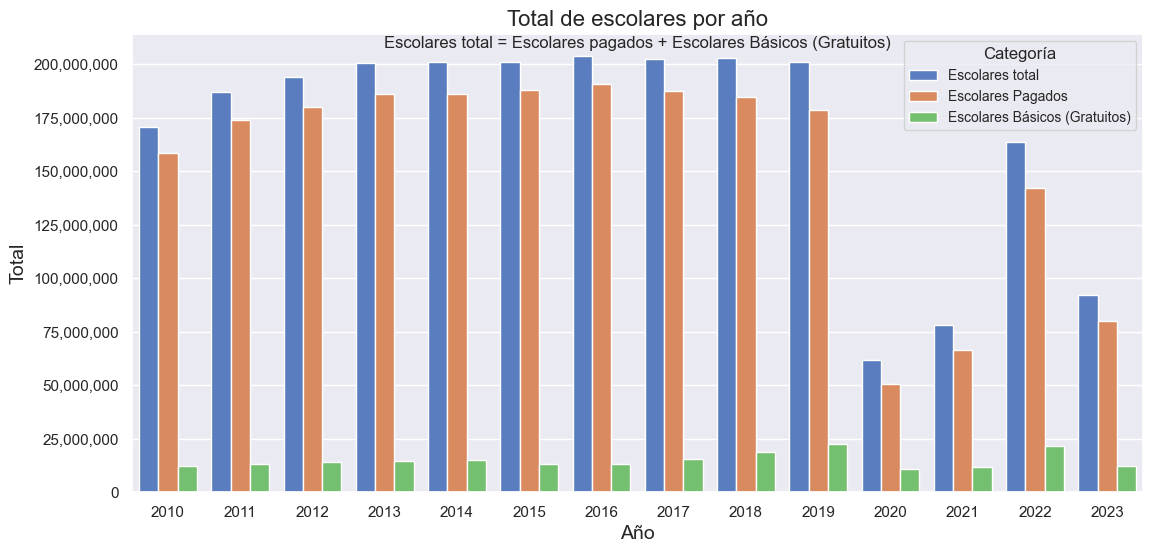

In [85]:


# Paso 2: Calcular la suma total de cada categoría por año
totales_por_año = df_totales.groupby("Año")[["Escolares total", "Escolares Pagados", "Escolares Básicos (Gratuitos)"]].sum().reset_index()

# Paso 3: Convertir las columnas de totales en una sola columna "Total" con su categoría correspondiente
totales_melted = totales_por_año.melt(id_vars=["Año"], var_name="Categoría", value_name="Total")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
ax = sns.barplot(data=totales_melted, x="Año", y="Total", hue="Categoría", palette="muted")

# Personalización del gráfico
plt.title("Total de escolares por año", fontsize=16)  # Ajustar el tamaño del título
plt.xlabel("Año", fontsize=14)  # Ajustar el tamaño del nombre del eje x
plt.ylabel("Total", fontsize=14)  # Ajustar el tamaño del nombre del eje y

# Ajustar la leyenda
plt.legend(title="Categoría", title_fontsize=12, fontsize=10)  # Ajustar el tamaño de la leyenda

# Ajustar el eje Y para mostrar los números con punto
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Agregar subtítulo debajo del título con mayor espacio (pad)
plt.text(0.5, 0.98, 'Escolares total = Escolares pagados + Escolares Básicos (Gratuitos)', fontsize=12, ha='center', va='center', transform=ax.transAxes)

# Ajustar el espacio entre el título y la gráfica
plt.tight_layout(pad=2.0)

# Mostrar el gráfico
plt.show()


En este gráfico, se pretende estudiar el comportamiento de dos componentes específicos en el uso del transporte: el número de estudiantes y la cantidad de personas de la tercera edad (que cuentan con gratuidad) a lo largo de los años.

Observamos que la cantidad total de estudiantes muestra un comportamiento más estacionario desde el año 2013 hasta 2019, lo cual sugiere que ha mantenido una variación más constante en ese período. Sin embargo, nuevamente se ve afectado por el impacto del Covid en gran medida, lo que puede haber provocado una disminución en el uso del transporte público por parte de los estudiantes durante el 2020.

Por otro lado, se nota una disminución en la cantidad de escolares pagados a partir del año 2016, lo que podría estar relacionado con acuerdos o negociaciones colectivas con los estudiantes. Además, se observa un aumento en el uso de pasajes gratuitos, que corresponde a las personas de la tercera edad. Esto podría explicarse por un mayor número de adultos mayores que optan por utilizar el metro como medio de transporte.

En resumen, el gráfico revela distintos patrones de comportamiento en los usuarios del transporte público, específicamente entre estudiantes y personas de la tercera edad con gratuidad. Estos patrones pueden estar influenciados por factores sociales, económicos y eventos como el Covid-19, lo que destaca la importancia de analizar detalladamente los distintos segmentos de usuarios para entender mejor las tendencias y tomar decisiones informadas en la planificación del transporte público.


In this graph, we aim to study the behavior of two specific components in public transportation usage: the number of students and the count of senior citizens (who have free fares) over the years.

We observe that the total number of students exhibits a more stationary behavior from 2013 to 2019, indicating a relatively stable variation during this period. However, it is evident that this stability was disrupted significantly by the impact of the Covid-19 pandemic in 2020, resulting in a decrease in public transportation usage by students.

On the other hand, there is a decline in the number of paying school students starting from 2016, which could be attributed to collective agreements or negotiations with students. Additionally, we notice an increase in the usage of free fares, representing the elderly population. This could be explained by a higher number of senior citizens opting for metro transportation.

In summary, the graph reveals distinct patterns in public transportation users, particularly among students and senior citizens with free fares. These patterns may be influenced by social, economic factors, and events like the Covid-19 pandemic, emphasizing the significance of analyzing different user segments to better understand trends and make informed decisions in public transportation planning.

### Grafico N°3 
### 1. Distribución porcentual de pasajeros por año 
### 2. Distribución de pasajeros por año

C:\Users\simon\AppData\Local\Temp\ipykernel_4532\2896723006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Porcentaje Escolares"] = df_totales["Escolares total"] / df_totales["Total Red"]
C:\Users\simon\AppData\Local\Temp\ipykernel_4532\2896723006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Porcentaje Pasajeros"] = df_totales["Pasajeros comunes"] / df_totales["Total Red"]


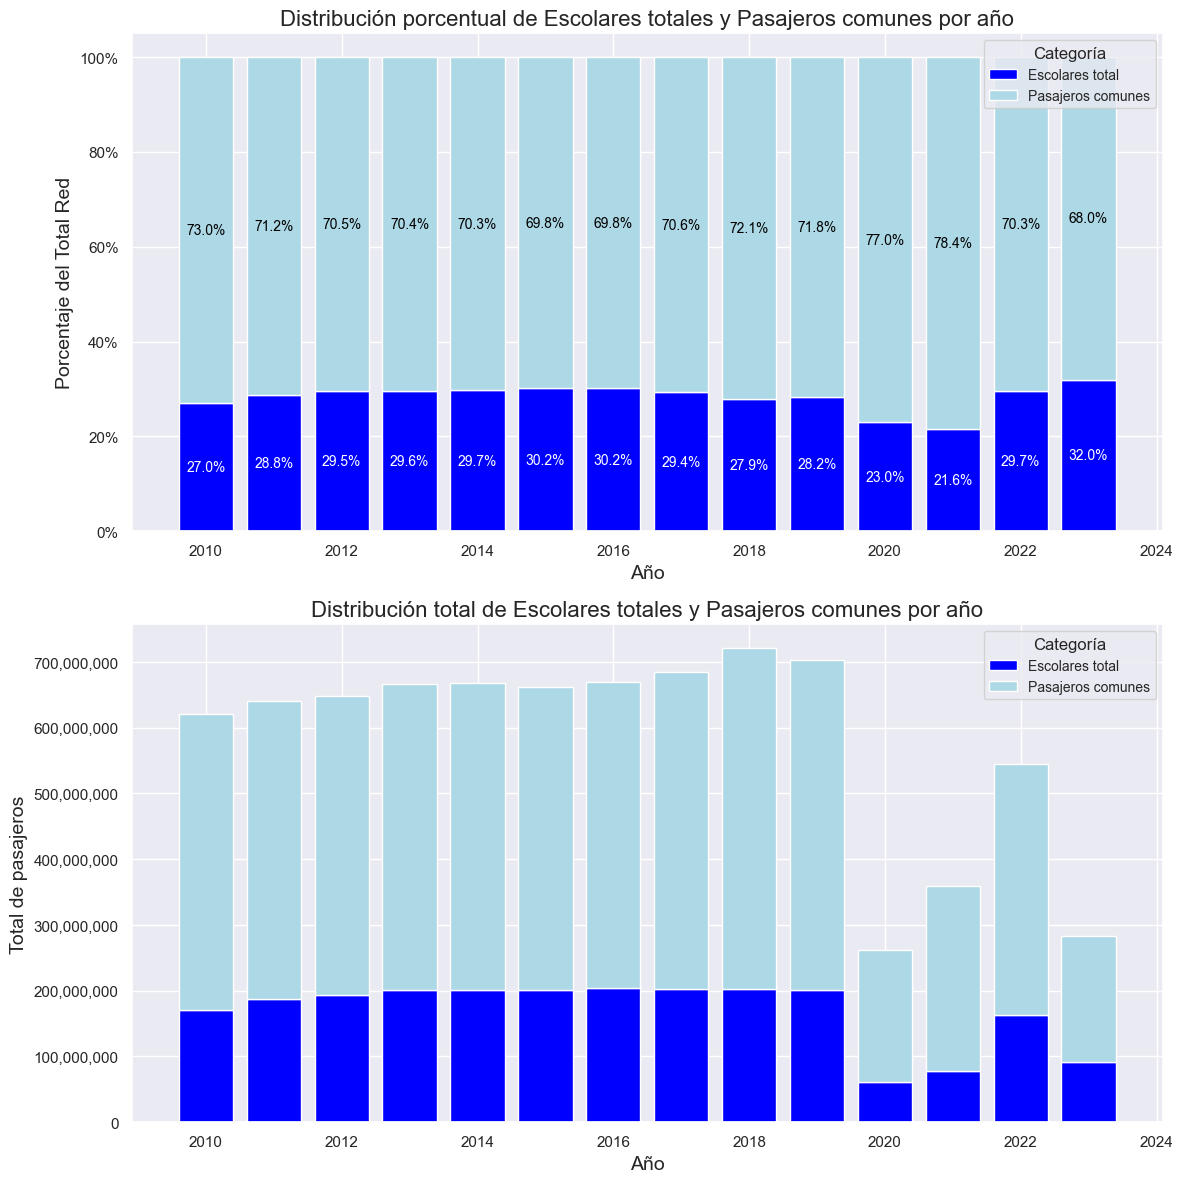

In [86]:
# Calcular los porcentajes en función del "Total Red"
df_totales["Porcentaje Escolares"] = df_totales["Escolares total"] / df_totales["Total Red"]
df_totales["Porcentaje Pasajeros"] = df_totales["Pasajeros comunes"] / df_totales["Total Red"]

# Calcular los promedios por año de "Pasajeros comunes" y "Escolares total"
promedio_pasajeros = df_totales.groupby("Año")["Porcentaje Pasajeros"].mean()
promedio_escolares = df_totales.groupby("Año")["Porcentaje Escolares"].mean()

# Crear el gráfico de barras con Matplotlib
plt.figure(figsize=(12, 12))  # Tamaño del gráfico

# Generar una barra para cada año con los porcentajes promedio correspondientes
for i, year in enumerate(promedio_pasajeros.index):
    plt.subplot(2, 1, 1)
    plt.bar(year, promedio_escolares.iloc[i], color="blue", label="Escolares total" if i == 0 else "")
    plt.bar(year, promedio_pasajeros.iloc[i], bottom=promedio_escolares.iloc[i], color="lightblue", label="Pasajeros comunes" if i == 0 else "")
    plt.text(year, promedio_escolares.iloc[i] / 2, f"{promedio_escolares.iloc[i]:.1%}", ha='center', va='center', fontsize=10, color="white")
    plt.text(year, promedio_escolares.iloc[i] + promedio_pasajeros.iloc[i] / 2, f"{promedio_pasajeros.iloc[i]:.1%}", ha='center', va='center', fontsize=10, color="black")
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1.0))
    plt.title("Distribución porcentual de Escolares totales y Pasajeros comunes por año", fontsize=16)
    plt.xlabel("Año", fontsize=14)
    plt.ylabel("Porcentaje del Total Red", fontsize=14)
    plt.legend(title="Categoría", title_fontsize=12, fontsize=10)

# Calcular la suma total por año de "Pasajeros comunes" y "Escolares total"
total_pasajeros = df_totales.groupby("Año")["Pasajeros comunes"].sum()
total_escolares = df_totales.groupby("Año")["Escolares total"].sum()

# Generar una barra para cada año con los totales correspondientes
for i, year in enumerate(total_pasajeros.index):
    plt.subplot(2, 1, 2)
    plt.bar(year, total_escolares.iloc[i], color="blue", label="Escolares total" if i == 0 else "")
    plt.bar(year, total_pasajeros.iloc[i], bottom=total_escolares.iloc[i], color="lightblue", label="Pasajeros comunes" if i == 0 else "")
    plt.gca().yaxis.set_major_formatter('{x:,.0f}')
    plt.title("Distribución total de Escolares totales y Pasajeros comunes por año", fontsize=16)
    plt.xlabel("Año", fontsize=14)
    plt.ylabel("Total de pasajeros", fontsize=14)
    plt.legend(title="Categoría", title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()



En estos dos gráficos, visualizamos los mismos datos, que incluyen tanto a los estudiantes totales (incluidos los que viajan gratis) como a los pasajeros comunes. Podemos observar una tendencia al alza a partir del año 2016, como discutimos anteriormente en los gráficos anteriores. Lo que es particularmente relevante es el porcentaje constante que se mantiene entre los estudiantes y los pasajeros comunes, incluso a medida que aumenta el número total de pasajeros. Solo hay una variación notable a partir del año 2020, que puede atribuirse al impacto del COVID. Sin embargo, los porcentajes se estabilizan rápidamente para el año 2022, a pesar de una disminución en el número total de pasajeros.

Este gráfico proporciona información valiosa sobre la proporción de estudiantes y pasajeros comunes entre todos los pasajeros, lo cual es información crucial para realizar predicciones y planificar el futuro.


In these two graphs, we visualize the same data, including both total students (including those traveling for free) and regular passengers. We can observe an upward trend starting from the year 2016, as we discussed in the previous graphs. What's particularly relevant is the consistent percentage that is maintained between students and regular passengers, even as the total number of passengers increases. There's only a noticeable variation starting from the year 2020, which can be attributed to the impact of COVID. However, the percentages quickly stabilize by the year 2022, despite a decrease in the total number of passengers.

This graph provides valuable insights into the proportion of students and regular passengers among all passengers, which is crucial information for making predictions and planning for the future.

## Gráficos exploratorios de pasajeros por meses

### Gráfico N°4 
### 1. Total de pasajeros agrupados por mes 
### 2. Total de pasajeros comunes y escolares agrupados por Mes

C:\Users\simon\AppData\Local\Temp\ipykernel_4532\3564698773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales.sort_values(by="Mes y año", inplace=True)
C:\Users\simon\AppData\Local\Temp\ipykernel_4532\3564698773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_totales["Mes y año"] = pd.to_datetime(df_totales["Mes y año"])
C:\Users\simon\AppData\Local\Temp\ipykernel_4532\3564698773.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

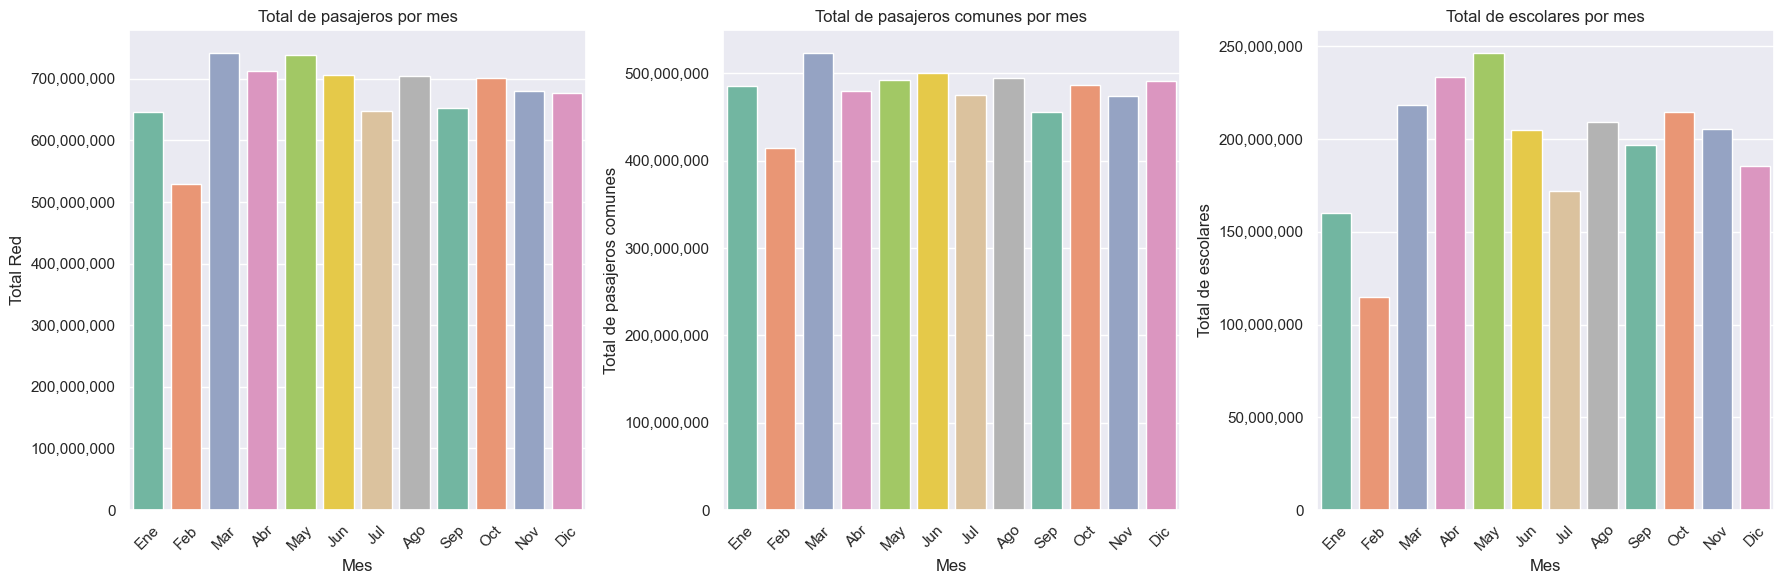

In [87]:

# Ordenar el DataFrame por la columna "Mes y año"
df_totales.sort_values(by="Mes y año", inplace=True)

# Convertir la columna "Mes y año" al formato de fecha
df_totales["Mes y año"] = pd.to_datetime(df_totales["Mes y año"])

# Extraer el mes de la columna de fechas
df_totales["Mes"] = df_totales["Mes y año"].dt.month

# Calcular la suma total de "Total Red" por mes
total_por_mes = df_totales.groupby("Mes")["Total Red"].sum().reset_index()

# Calcular el total de pasajeros comunes por mes
total_pasajeros_comunes_por_mes = df_totales.groupby("Mes")["Pasajeros comunes"].sum()

# Calcular el total de escolares por mes
total_escolares_por_mes = df_totales.groupby("Mes")["Escolares total"].sum()

# Crear una lista con los nombres de los meses en el orden correcto
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crear la figura y los ejes para los tres gráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Paleta de colores
colores = sns.color_palette("Set2")

# Gráfico 1: Total de pasajeros por mes
sns.barplot(data=total_por_mes, x="Mes", y="Total Red", ax=axs[0], palette=colores)
axs[0].set_title("Total de pasajeros por mes")
axs[0].set_xlabel("Mes")
axs[0].set_ylabel("Total Red")
axs[0].set_xticks(total_por_mes["Mes"] - 1)
axs[0].set_xticklabels([meses[mes - 1] for mes in total_por_mes["Mes"]], rotation=45)
axs[0].yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Gráfico 2: Total de pasajeros comunes por mes
sns.barplot(x=total_pasajeros_comunes_por_mes.index, y=total_pasajeros_comunes_por_mes.values, ax=axs[1], palette=colores)
axs[1].set_title("Total de pasajeros comunes por mes")
axs[1].set_xlabel("Mes")
axs[1].set_ylabel("Total de pasajeros comunes")
axs[1].set_xticks(total_pasajeros_comunes_por_mes.index - 1)
axs[1].set_xticklabels(meses, rotation=45)
axs[1].ticklabel_format(style='plain', axis='y')
axs[1].yaxis.set_major_formatter('{x:,.0f}')

# Gráfico 3: Total de escolares por mes
sns.barplot(x=total_escolares_por_mes.index, y=total_escolares_por_mes.values, ax=axs[2], palette=colores)
axs[2].set_title("Total de escolares por mes")
axs[2].set_xlabel("Mes")
axs[2].set_ylabel("Total de escolares")
axs[2].set_xticks(total_escolares_por_mes.index - 1)
axs[2].set_xticklabels(meses, rotation=45)
axs[2].ticklabel_format(style='plain', axis='y')
axs[2].yaxis.set_major_formatter('{x:,.0f}')

# Ajustar el espacio entre los gráficos para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()



Estos 3 gráficos del total de pasajeros por mes fueron creados con el propósito de visualizar patrones de estacionalidad y tendencia, con el fin de determinar si existe algún tipo de estas dos y seleccionar el mejor modelo de aprendizaje automático (ML) para predecir la cantidad de pasajeros en el futuro.

A simple vista, podemos observar una disminución en el mes de febrero tanto en el total de pasajeros como en los totales de escolares y pasajeros comunes. Esta disminución se debe claramente a las vacaciones que ocurren en nuestro país durante este mes.

Sin embargo, los pasajeros totales no muestran grandes variaciones en los otros meses, lo que sugiere que no hay una estacionalidad si no mas una tendencia evidente en los datos a lo largo del tiempo, que es lo que realmente nos interesa analizar.

Por otro lado, al analizar los datos separadamente para los pasajeros comunes y los estudiantes, también observamos una tendencia en los datos a lo largo de los meses. Sin embargo, al comparar esta información con la gráfica del total de pasajeros por año, podemos inferir que aunque la cantidad de usuarios aumenta, lo hace conforme a la tendencia mes a mes.

En resumen, podemos concluir que la cantidad de personas que utilizan el metro mes a mes es relativamente constante, aunque aumente la cantidad de usuarios en general. Esto nos indica que existe una tendencia al alza en el uso del metro a lo largo del tiempo, pero no hay patrones de estacionalidad claramente definidos en los datos mensuales.

These two bar graphs of total passengers per month were created with the aim of visualizing seasonality and trend patterns to determine if any of these exist and to select the best machine learning (ML) model for predicting passenger quantities in the future.

At first glance, we can observe a decrease in the month of February in both total passengers and the totals for regular and student passengers. This decrease is clearly due to vacations occurring in our country during this month.

However, total passengers show minimal variations in the other months, suggesting the absence of seasonality and a more evident trend in the data over time, which is what we are particularly interested in analyzing.

Furthermore, upon analyzing the data separately for regular passengers and students, we also observe a trend in the data over the months. Nevertheless, when comparing this information with the graph of total passengers per year, we can infer that even though the number of users increases, it does so in line with the month-to-month trend.

In summary, we can conclude that the number of people using the metro on a monthly basis is relatively constant, even though the overall number of users increases. This indicates a clear upward trend in metro usage over time, but there are no clearly defined seasonality patterns in the monthly data.

This analysis allows us to gain insights into trends and usage patterns in the metro system, which can be valuable for selecting the appropriate predictive models and making data-driven decisions for public transportation management.



## ML para predecir los pasajeros mes a mes

### Analisis de estacionalidad 

In [88]:
#Crear Df para estudiar su estacionalidad

df_ml = df[["Mes y año", "Total Red"]]
df_ml

,Mes y año,Total Red
0,2010-01-01,45448230
1,2010-02-01,35380504
2,2010-03-01,50872123
3,2010-04-01,55724226
4,2010-05-01,55332802
...,...,...
157,2023-02-01,34606344
158,2023-03-01,53577205
159,2023-04-01,49637585
160,2023-05-01,55181712


In [89]:
# Paso 1: Convertir la columna "Mes y año" al formato de fecha
df_ml["Mes y año"] = pd.to_datetime(df_ml["Mes y año"], format="%Y.%m.%d")

# Paso 2: Crear las nuevas columnas "Año" y "Mes"
df_ml["Año"] = df_ml["Mes y año"].dt.year
df_ml["Mes"] = df_ml["Mes y año"].dt.month

# Paso 3: Borrar la columna "Mes y año" si ya no se necesita
df_ml.drop("Mes y año", axis=1, inplace=True)

df_ml

C:\Users\simon\AppData\Local\Temp\ipykernel_4532\1341477925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml["Mes y año"] = pd.to_datetime(df_ml["Mes y año"], format="%Y.%m.%d")
C:\Users\simon\AppData\Local\Temp\ipykernel_4532\1341477925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml["Año"] = df_ml["Mes y año"].dt.year
C:\Users\simon\AppData\Local\Temp\ipykernel_4532\1341477925.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,Total Red,Año,Mes
0,45448230,2010,1
1,35380504,2010,2
2,50872123,2010,3
3,55724226,2010,4
4,55332802,2010,5
...,...,...,...
157,34606344,2023,2
158,53577205,2023,3
159,49637585,2023,4
160,55181712,2023,5


C:\Users\simon\AppData\Local\Temp\ipykernel_4532\4150530192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml["Fecha"] = pd.to_datetime(df_ml["Año"].astype(str) + "-" + df_ml["Mes"].astype(str) + "-01")


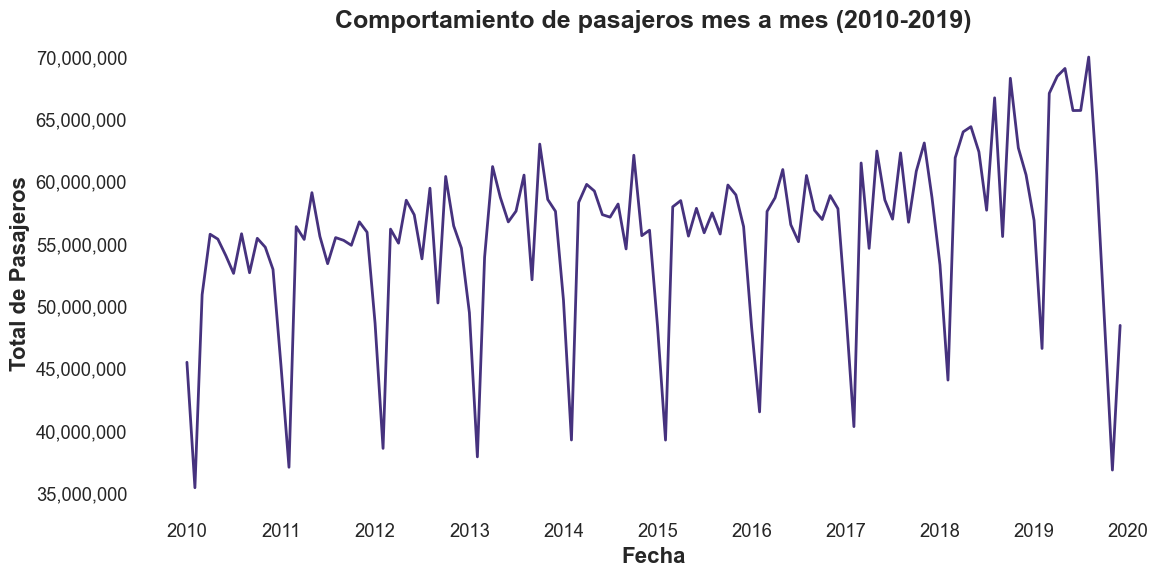

In [90]:

# Paso 1: Crear una nueva columna de fecha con el formato adecuado para Plotly
df_ml["Fecha"] = pd.to_datetime(df_ml["Año"].astype(str) + "-" + df_ml["Mes"].astype(str) + "-01")

# Paso 2: Filtrar los datos para que solo incluyan los años 2010 a 2019
df_ml_2010_2019 = df_ml[(df_ml["Año"] >= 2010) & (df_ml["Año"] <= 2019)]

# Paso 3: Configurar el estilo de Seaborn para un aspecto más "marketero"
sns.set(style="darkgrid", palette="viridis", font_scale=1.2)

# Paso 4: Crear el gráfico de línea utilizando Seaborn
plt.figure(figsize=(12, 6))  # Tamaño del gráfico

# Generar la línea para el comportamiento de los pasajeros mes a mes entre los años 2010 y 2019
sns.lineplot(data=df_ml_2010_2019, x="Fecha", y="Total Red", linewidth=2)

# Personalización del gráfico
plt.title("Comportamiento de pasajeros mes a mes (2010-2019)", fontsize=18, fontweight="bold")  # Ajustar el tamaño y estilo del título
plt.xlabel("Fecha", fontsize=16, fontweight="bold")  # Ajustar el tamaño y estilo del nombre del eje x
plt.ylabel("Total de Pasajeros", fontsize=16, fontweight="bold")  # Ajustar el tamaño y estilo del nombre del eje y

# Ajustar el eje Y para no mostrar notación científica y agregar puntos
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter('{x:,.0f}')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espaciado para evitar cortes en las etiquetas del eje x

# Cambiar el fondo del gráfico
sns.set(style="darkgrid", palette="viridis")
plt.gca().set_facecolor('white')

# Mostrar el gráfico
plt.show()


### Calculo de la prueba de Dickey-Fuller hasta 2019

In [91]:
# Vamos a combinar la columna "Año" y "Mes" en una nueva columna "Fecha" para tener una serie de tiempo completa
df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))
df_ml.set_index('Fecha', inplace=True)

# Limitamos los datos hasta el año 2019
serie_tiempo = df_ml['Total Red'][:'2019']

# Realizamos la prueba de Dickey-Fuller
resultado = sm.tsa.adfuller(serie_tiempo)

# Imprimimos los resultados
print('Resultado de la prueba de Dickey-Fuller hasta 2019:')
print('Estadística de prueba:', resultado[0])
print('Valor p:', resultado[1])
print('Valores críticos:')
for key, value in resultado[4].items():
    print(f'   {key}: {value}')


Resultado de la prueba de Dickey-Fuller hasta 2019:
Estadística de prueba: -1.4240431454495606
Valor p: 0.5706968099673339
Valores críticos:
   1%: -3.492995948509562
   5%: -2.888954648057252
   10%: -2.58139291903223


C:\Users\simon\AppData\Local\Temp\ipykernel_4532\4180567543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))


### Gráficos de autocorrelación hasta 2019

C:\Users\simon\AppData\Local\Temp\ipykernel_4532\1559377101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))


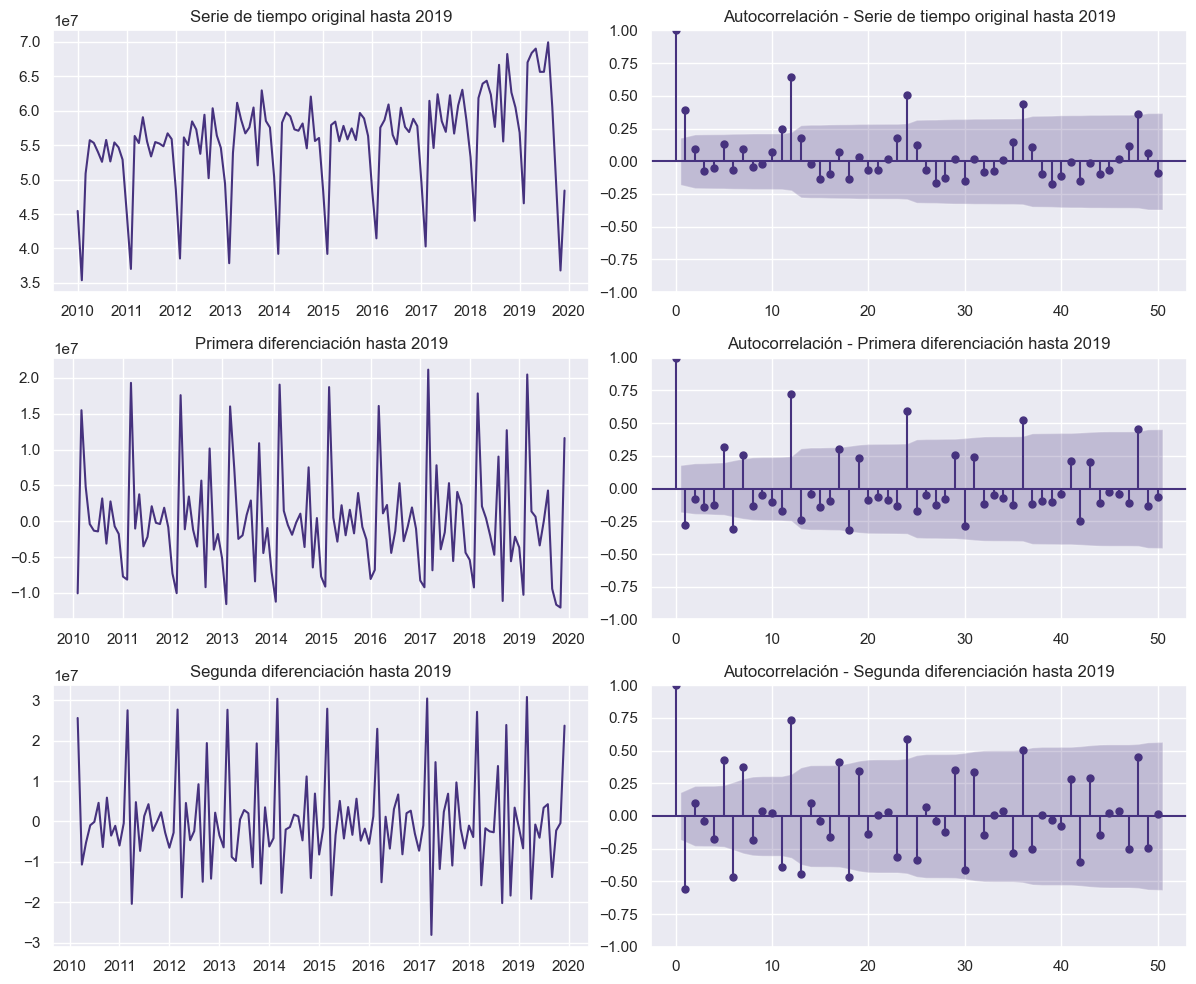

In [92]:
# Vamos a combinar la columna "Año" y "Mes" en una nueva columna "Fecha" para tener una serie de tiempo completa
df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))
df_ml.set_index('Fecha', inplace=True)

# Limitamos los datos hasta el año 2019
serie_tiempo = df_ml['Total Red'][:'2019']

# Gráfico de la serie de tiempo original y su autocorrelación hasta 2019
plt.figure(figsize=(12, 10))
plt.subplot(321)
plt.plot(serie_tiempo)
plt.title('Serie de tiempo original hasta 2019')
plt.subplot(322)
sm.graphics.tsa.plot_acf(serie_tiempo, lags=50, ax=plt.gca())
plt.title('Autocorrelación - Serie de tiempo original hasta 2019')

# Realizamos la primera diferenciación
serie_diferenciada_1 = serie_tiempo.diff().dropna()

# Gráfico de la primera diferenciación y su autocorrelación hasta 2019
plt.subplot(323)
plt.plot(serie_diferenciada_1)
plt.title('Primera diferenciación hasta 2019')
plt.subplot(324)
sm.graphics.tsa.plot_acf(serie_diferenciada_1, lags=50, ax=plt.gca())
plt.title('Autocorrelación - Primera diferenciación hasta 2019')

# Realizamos la segunda diferenciación
serie_diferenciada_2 = serie_diferenciada_1.diff().dropna()

# Gráfico de la segunda diferenciación y su autocorrelación hasta 2019
plt.subplot(325)
plt.plot(serie_diferenciada_2)
plt.title('Segunda diferenciación hasta 2019')
plt.subplot(326)
sm.graphics.tsa.plot_acf(serie_diferenciada_2, lags=50, ax=plt.gca())
plt.title('Autocorrelación - Segunda diferenciación hasta 2019')

plt.tight_layout()
plt.show()


### Resultado de la prueba de Dickey-Fuller para la primera y segunda diferenciación

In [93]:
# Primero, asegúrate de tener los datos en el formato adecuado para el análisis de series de tiempo
# Vamos a combinar la columna "Año" y "Mes" en una nueva columna "Fecha" para tener una serie de tiempo completa
df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))
df_ml.set_index('Fecha', inplace=True)

# Limitamos los datos hasta el año 2019
serie_tiempo = df_ml['Total Red'][:'2019']

# Realizamos la primera diferenciación
serie_diferenciada_1 = serie_tiempo.diff().dropna()

# Realizamos la prueba de Dickey-Fuller para la primera diferenciación
resultado_diferenciacion_1 = sm.tsa.adfuller(serie_diferenciada_1)

# Formateamos los valores de p para mostrar más decimales
p_valor_diferenciacion_1 = "{:.20f}".format(resultado_diferenciacion_1[1])

# Imprimimos los resultados para la primera diferenciación
print('Resultado de la prueba de Dickey-Fuller para la primera diferenciación:')
print('Estadística de prueba:', resultado_diferenciacion_1[0])
print('Valor p:', p_valor_diferenciacion_1)
print('Valores críticos:')
for key, value in resultado_diferenciacion_1[4].items():
    print(f'   {key}: {value}')

# Realizamos la segunda diferenciación
serie_diferenciada_2 = serie_diferenciada_1.diff().dropna()

# Realizamos la prueba de Dickey-Fuller para la segunda diferenciación
resultado_diferenciacion_2 = sm.tsa.adfuller(serie_diferenciada_2)

# Formateamos los valores de p para mostrar más decimales
p_valor_diferenciacion_2 = "{:.20f}".format(resultado_diferenciacion_2[1])

# Imprimimos los resultados para la segunda diferenciación
print('\nResultado de la prueba de Dickey-Fuller para la segunda diferenciación:')
print('Estadística de prueba:', resultado_diferenciacion_2[0])
print('Valor p:', p_valor_diferenciacion_2)
print('Valores críticos:')
for key, value in resultado_diferenciacion_2[4].items():
    print(f'   {key}: {value}')


Resultado de la prueba de Dickey-Fuller para la primera diferenciación:
Estadística de prueba: -5.132636030045514
Valor p: 0.00001204833162756075
Valores críticos:
   1%: -3.492995948509562
   5%: -2.888954648057252
   10%: -2.58139291903223

Resultado de la prueba de Dickey-Fuller para la segunda diferenciación:
Estadística de prueba: -8.716964846721098
Valor p: 0.00000000000003467334
Valores críticos:
   1%: -3.4942202045135513
   5%: -2.889485291005291
   10%: -2.5816762131519275


C:\Users\simon\AppData\Local\Temp\ipykernel_4532\4151984818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))


### Gráfica de PACF Segunda diferenciación

C:\Users\simon\AppData\Local\Temp\ipykernel_4532\3358425645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))


<Figure size 800x500 with 0 Axes>

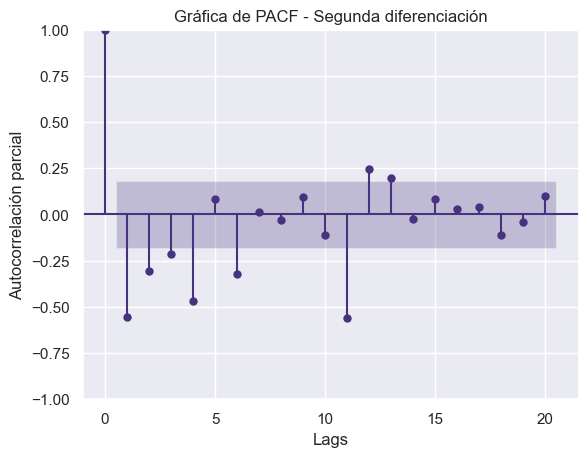

In [94]:
# Primero, asegúrate de tener los datos en el formato adecuado para el análisis de series de tiempo
# Vamos a combinar la columna "Año" y "Mes" en una nueva columna "Fecha" para tener una serie de tiempo completa
df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))
df_ml.set_index('Fecha', inplace=True)

# Limitamos los datos hasta el año 2019
serie_tiempo = df_ml['Total Red'][:'2019']

# Realizamos la segunda diferenciación
serie_diferenciada_1 = serie_tiempo.diff().dropna()
serie_diferenciada_2 = serie_diferenciada_1.diff().dropna()

# Graficamos la PACF para la segunda diferenciación
plt.figure(figsize=(8, 5))
sm.graphics.tsa.plot_pacf(serie_diferenciada_2, lags=20, alpha=0.05)
plt.title('Gráfica de PACF - Segunda diferenciación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación parcial')
plt.show()

### Gráfica de ACF - Segunda diferenciación

C:\Users\simon\AppData\Local\Temp\ipykernel_4532\690726683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))


<Figure size 800x500 with 0 Axes>

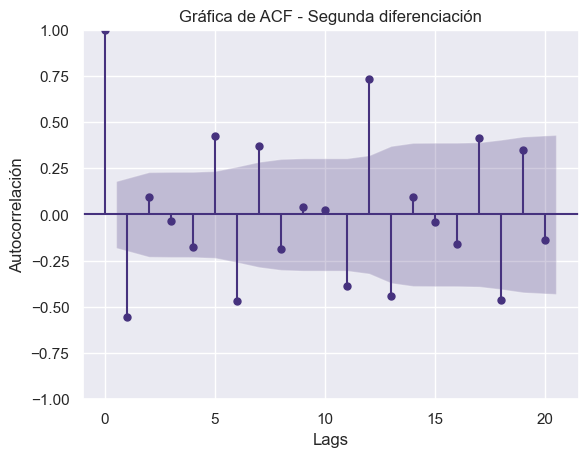

In [95]:
# Primero, asegúrate de tener los datos en el formato adecuado para el análisis de series de tiempo
# Vamos a combinar la columna "Año" y "Mes" en una nueva columna "Fecha" para tener una serie de tiempo completa
df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))
df_ml.set_index('Fecha', inplace=True)

# Limitamos los datos hasta el año 2019
serie_tiempo = df_ml['Total Red'][:'2019']

# Realizamos la segunda diferenciación
serie_diferenciada_1 = serie_tiempo.diff().dropna()
serie_diferenciada_2 = serie_diferenciada_1.diff().dropna()

# Graficamos la ACF para la segunda diferenciación
plt.figure(figsize=(8, 5))
sm.graphics.tsa.plot_acf(serie_diferenciada_2, lags=20, alpha=0.05)
plt.title('Gráfica de ACF - Segunda diferenciación')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()


## Conclusion sobre la estacionalidad del modelo.





Después de realizar un análisis exhaustivo de la serie temporal de los datos de "Red Total", pudimos obtener conclusiones importantes para poder aplicar modelos predictivos adecuados. A continuación, presentamos las conclusiones de la exploración de datos:

1. Estacionalidad de los datos: Utilizando el método de Dickey-Fuller, determinamos que la serie temporal de "Red Total" no presenta estacionalidad significativa, ya que el valor p obtenido (0.57) supera el límite crítico de 0.05. Por lo tanto, podemos concluir que los datos principales no son estacionales.

2. Transformación para estacionalidad: Dado que nuestros datos no son estacionales, aplicamos técnicas de diferenciación para convertir la serie temporal en una secuencia estacionaria. Realizamos dos diferenciaciones sucesivas y examinamos los valores p resultantes. En la primera diferenciación, el valor p fue de 0.000012, y en la segunda diferenciación, el valor p fue aún menor, de 0.000000000000034. Estos valores confirman que hemos logrado convertir la serie en una secuencia estacionaria.

3. Selección de parámetros para ARIMA: Utilizamos las funciones de autocorrelación parcial (PACF) y autocorrelación (ACF) para determinar los parámetros de orden autoregresivo (AR) y de promedio móvil (MA) para el modelo ARIMA. Identificamos los rezagos significativos que sobresalen de la línea de importancia en ambas gráficas.

Concluida esta exploración de datos y selección de componentes para el modelo ARIMA, procederemos a graficar y evaluar su rendimiento. Además, realizaremos un benchmarking con otros modelos, como SARIMA y Prophet de Facebook, para comparar su capacidad predictiva y seleccionar el modelo más adecuado para nuestras necesidades.

After conducting a comprehensive analysis of the time series data for "Total Red," we have arrived at significant conclusions to apply suitable predictive models. Here are the key findings from the data exploration:

1. Seasonality of the data: Using the Dickey-Fuller test, we determined that the "Total Red" time series does not exhibit significant seasonality, as the obtained p-value (0.57) exceeds the critical threshold of 0.05. Hence, we can conclude that the primary data is non-seasonal.

2. Transformation for seasonality: Given the non-seasonality of the data, we applied differencing techniques to convert the time series into a stationary sequence. We performed two successive differencing operations and examined the resulting p-values. The first differencing yielded a p-value of 0.000012, and the second differencing further reduced it to 0.000000000000034. These values confirm the successful conversion of the series into a stationary one.

3. Selection of ARIMA parameters: To determine the autoregressive (AR) and moving average (MA) parameters for the ARIMA model, we utilized the partial autocorrelation function (PACF) and autocorrelation function (ACF) plots. By identifying the significant lags that extend beyond the significance line in both plots, we obtained the appropriate AR and MA orders.

With the data exploration and component selection for the ARIMA model concluded, we will proceed to visualize and evaluate its performance. Additionally, we will conduct benchmarking with other models, such as SARIMA and Facebook's Prophet, to compare their predictive capabilities and select the most suitable model for our needs.


### Modelo ARIMA

c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


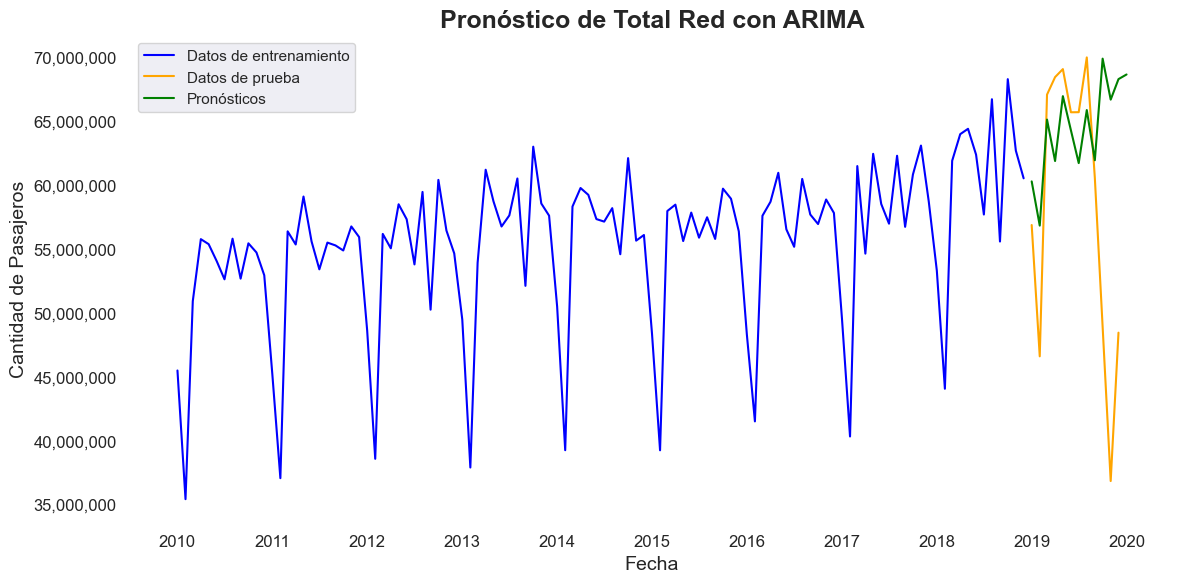

In [96]:

# Paso 4: Dividir los datos en conjuntos de entrenamiento y prueba
train_data = serie_tiempo["2010-01-01":"2018-12-31"]
test_data = serie_tiempo["2019-01-01":"2019-12-31"]

# Paso 5: Implementar el modelo ARIMA para entrenamiento
# NOTA: En esta etapa, deberás seleccionar los órdenes del modelo ARIMA (p, d, q) y ajustar el modelo a los datos de entrenamiento.

# Por ejemplo, para un modelo ARIMA con órdenes (1, 1, 1):
modelo = sm.tsa.ARIMA(train_data, order=(4, 2, 6))
resultado = modelo.fit()

# Paso 6: Hacer pronósticos con el modelo entrenado
pronosticos = resultado.predict(start="2019-01-01", end="2019-12-31", dynamic=True)

# Crear la gráfica utilizando Matplotlib
plt.figure(figsize=(12, 6))  # Tamaño del gráfico

# Datos de entrenamiento y prueba
plt.plot(train_data.index, train_data.values, label="Datos de entrenamiento", color="blue")
plt.plot(test_data.index, test_data.values, label="Datos de prueba", color="orange")

# Predicciones para el año 2019
plt.plot(pronosticos.index, pronosticos.values, label="Pronósticos", color="green")

# Personalización del gráfico
plt.title("Pronóstico de Total Red con ARIMA", fontsize=18, fontweight="bold")  # Ajustar el tamaño y estilo del título
plt.xlabel("Fecha", fontsize=14)  # Ajustar el tamaño y estilo del nombre del eje x
plt.ylabel("Cantidad de Pasajeros", fontsize=14)  # Ajustar el tamaño y estilo del nombre del eje y
plt.legend(loc="upper left")  # Ajustar la ubicación de la leyenda
plt.tick_params(axis="both", labelsize=12)  # Ajustar el tamaño de las etiquetas de los ejes

# Ajustar el eje Y para no mostrar notación científica y agregar puntos
plt.ticklabel_format(style='plain', axis='y')
plt.gca().yaxis.set_major_formatter('{x:,.0f}')

# Cambiar el fondo del gráfico con Seaborn
sns.set(style="whitegrid", palette="viridis")
plt.gca().set_facecolor('white')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espaciado para evitar cortes en las etiquetas del eje x

# Mostrar el gráfico
plt.show()


### Modelo SARIMA

C:\Users\simon\AppData\Local\Temp\ipykernel_4532\3143828513.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))


<Figure size 800x500 with 0 Axes>

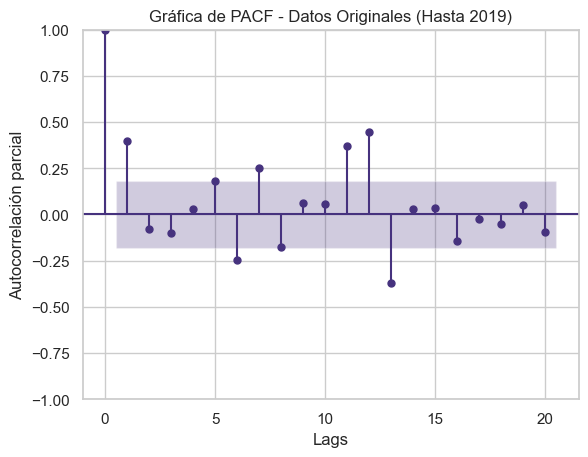

In [97]:
# Primero, asegúrate de tener los datos en el formato adecuado para el análisis de series de tiempo
# Vamos a combinar la columna "Año" y "Mes" en una nueva columna "Fecha" para tener una serie de tiempo completa
df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))
df_ml.set_index('Fecha', inplace=True)

# Limitamos los datos hasta el año 2019
serie_tiempo = df_ml['Total Red'][:'2019']

# Graficamos solo la PACF de los datos originales hasta el año 2019
plt.figure(figsize=(8, 5))
plot_pacf(serie_tiempo, lags=20, alpha=0.05)
plt.title('Gráfica de PACF - Datos Originales (Hasta 2019)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación parcial')
plt.show()


C:\Users\simon\AppData\Local\Temp\ipykernel_4532\1603036791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))


<Figure size 800x500 with 0 Axes>

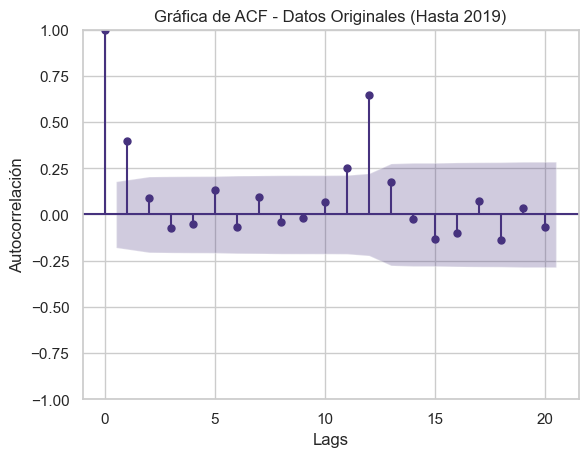

In [98]:
# Primero, asegúrate de tener los datos en el formato adecuado para el análisis de series de tiempo
# Vamos a combinar la columna "Año" y "Mes" en una nueva columna "Fecha" para tener una serie de tiempo completa
df_ml['Fecha'] = pd.to_datetime(df_ml['Año'].astype(str) + '-' + df_ml['Mes'].astype(str))
df_ml.set_index('Fecha', inplace=True)

# Limitamos los datos hasta el año 2019
serie_tiempo = df_ml['Total Red'][:'2019']

# Graficamos solo la ACF de los datos originales hasta el año 2019
plt.figure(figsize=(8, 5))
plot_acf(serie_tiempo, lags=20, alpha=0.05)
plt.title('Gráfica de ACF - Datos Originales (Hasta 2019)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()


c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\simon\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  war

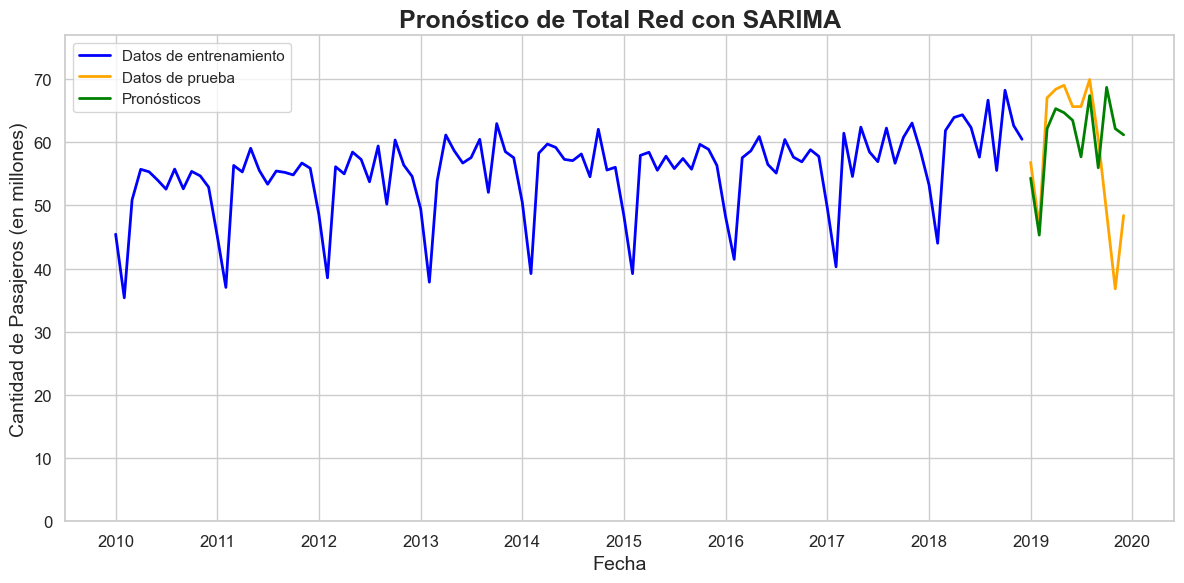

In [99]:
# Supongamos que ya tienes el DataFrame df_totales con los datos necesarios
# y has realizado los pasos 1, 2 y 3 que muestras en el comentario anterior.

# Paso 4: Dividir los datos en conjuntos de entrenamiento y prueba
train_data = serie_tiempo["2010-01-01":"2018-12-31"]
test_data = serie_tiempo["2019-01-01":"2019-12-01"]

# Paso 5: Implementar el modelo SARIMA para entrenamiento
# NOTA: En esta etapa, deberás seleccionar los órdenes del modelo SARIMA (p, d, q, P, D, Q, s) y ajustar el modelo a los datos de entrenamiento.

# Por ejemplo, para un modelo SARIMA con órdenes (5, 2, 4), (6, 1, 3, 12):
modelo = sm.tsa.SARIMAX(train_data, order=(5, 2, 4), seasonal_order=(6, 1, 3, 12))
resultado = modelo.fit()

# Paso 6: Hacer pronósticos con el modelo entrenado
pronosticos = resultado.predict(start="2019-01-01", end="2019-12-01", dynamic=True)

# Reducir los valores del eje Y dividiendo por un factor (por ejemplo, 1e6)
factor_reduccion = 1e6
train_data = train_data / factor_reduccion
test_data = test_data / factor_reduccion
pronosticos = pronosticos / factor_reduccion

# Crear un DataFrame con los pronósticos y las fechas correspondientes
df_pronosticos = pd.DataFrame({"Fecha": pronosticos.index, "Pronostico": pronosticos.values})

# Crear la figura utilizando Seaborn
plt.figure(figsize=(12, 6))  # Tamaño del gráfico

# Generar la línea para los datos de entrenamiento
sns.lineplot(data=train_data, linewidth=2, color="blue", label="Datos de entrenamiento")

# Generar la línea para los datos de prueba
sns.lineplot(data=test_data, linewidth=2, color="orange", label="Datos de prueba")

# Generar la línea para los pronósticos con un color diferente (por ejemplo, verde)
sns.lineplot(data=df_pronosticos, x="Fecha", y="Pronostico", linewidth=2, color="green", label="Pronósticos")

# Personalización del gráfico
plt.title("Pronóstico de Total Red con SARIMA", fontsize=18, fontweight="bold")  # Ajustar el tamaño y estilo del título
plt.xlabel("Fecha", fontsize=14)  # Ajustar el tamaño y estilo del nombre del eje x
plt.ylabel("Cantidad de Pasajeros (en millones)", fontsize=14)  # Ajustar el tamaño y estilo del nombre del eje y
plt.legend(loc="upper left")  # Ajustar la ubicación de la leyenda
plt.tick_params(axis="both", labelsize=12)  # Ajustar el tamaño de las etiquetas de los ejes

# Cambiar el fondo del gráfico con Seaborn
sns.set(style="darkgrid", palette="viridis")
plt.gca().set_facecolor('white')

# Ajustar el rango del eje Y para mostrar los valores en millones
plt.ylim(0, max(train_data.max(), test_data.max(), pronosticos.max()) * 1.1)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espaciado para evitar cortes en las etiquetas del eje x

# Mostrar el gráfico
plt.show()


### Conclusión del modelo SARIMA

Para preparar la gráfica del modelo SARIMA, es fundamental asegurarse de que los datos de la serie de tiempo sean estacionarios. Durante nuestro análisis exploratorio de datos, observamos la presencia de estacionalidad, especialmente con valores más altos de abril a enero y valores más bajos en febrero. Esto nos motivó a considerar el uso del modelo SARIMA, el cual tiene en cuenta el componente estacional.

Procedimos a calcular los componentes AR y MA para los datos originales sin diferenciar, lo cual reveló un patrón distinto en comparación con el modelo ARIMA. Sin embargo, para mejorar el rendimiento del modelo y obtener mejores resultados en comparación con los datos de prueba, decidimos aplicar una diferenciación de primer orden (D=1).

Al incorporar la diferenciación, pudimos estabilizar la varianza y hacer que la serie de tiempo fuera estacionaria, lo cual resultó beneficioso para el modelo SARIMA. Esto nos permitió capturar los patrones estacionales de manera más efectiva y lograr predicciones precisas.

En resumen, el modelo SARIMA con diferenciación de primer orden (D=1) tuvo un buen desempeño y mostró una buena alineación con los datos de prueba, lo que lo convierte en una opción adecuada para predecir valores futuros en la serie de tiempo. La gráfica resultante mostrará los valores predichos junto con los datos históricos, brindando información valiosa sobre el rendimiento del modelo.

### Modelo Prophet 

19:23:16 - cmdstanpy - INFO - Chain [1] start processing
19:23:16 - cmdstanpy - INFO - Chain [1] done processing


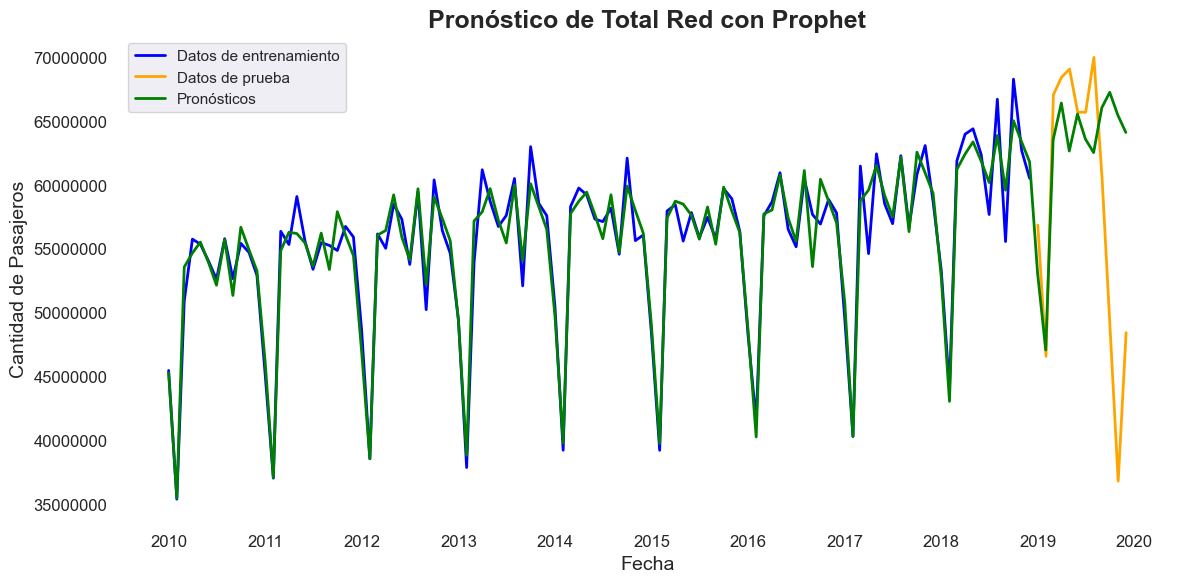

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Supongamos que ya tienes el DataFrame serie_tiempo con los datos necesarios
# y has realizado los pasos 1, 2 y 3 que muestras en el comentario anterior.

# Paso 4: Crear y entrenar el modelo Prophet
model = Prophet(changepoint_prior_scale=0.2, seasonality_prior_scale=50, holidays_prior_scale=30)
model.fit(train_df)

# Paso 5: Hacer predicciones mensuales para el año 2019
future = model.make_future_dataframe(periods=12, freq='M')  # 12 meses para el año 2019
forecast = model.predict(future)

# Función para formatear los números en el eje y sin notación científica
def format_y_axis(value, tick_number):
    return '{:.0f}'.format(value)

# Crear la figura utilizando Seaborn
plt.figure(figsize=(12, 6))  # Tamaño del gráfico

# Generar la línea para los datos de entrenamiento
sns.lineplot(data=train_df, x="ds", y="y", linewidth=2, color="blue", label="Datos de entrenamiento")

# Generar la línea para los datos de prueba
sns.lineplot(data=test_df, x="ds", y="y", linewidth=2, color="orange", label="Datos de prueba")

# Generar la línea para las predicciones con un color diferente (por ejemplo, verde)
sns.lineplot(data=forecast, x="ds", y="yhat", linewidth=2, color="green", label="Pronósticos")

# Personalización del gráfico
plt.title("Pronóstico de Total Red con Prophet", fontsize=18, fontweight="bold")  # Ajustar el tamaño y estilo del título
plt.xlabel("Fecha", fontsize=14)  # Ajustar el tamaño y estilo del nombre del eje x
plt.ylabel("Cantidad de Pasajeros", fontsize=14)  # Ajustar el tamaño y estilo del nombre del eje y

# Ajustar el eje y para mostrar los valores completos en lugar de notación científica
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

plt.legend(loc="upper left")  # Ajustar la ubicación de la leyenda
plt.tick_params(axis="both", labelsize=12)  # Ajustar el tamaño de las etiquetas de los ejes

# Cambiar el fondo del gráfico con Seaborn
sns.set(style="darkgrid", palette="viridis")
plt.gca().set_facecolor('white')

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el espaciado para evitar cortes en las etiquetas del eje x

# Mostrar el gráfico
plt.show()


### Conclusión del modelo Prophet

El modelo Prophet surge como una herramienta útil para realizar un benchmark, ya que es relativamente sencillo de utilizar y no requiere de ajuste de hiperparámetros complicados. Sin embargo, esto no significa que sea menos efectivo en su capacidad para identificar relaciones y similitudes con otros modelos.

En este caso, el modelo Prophet ofrece parámetros interactivos que permiten ajustar su rendimiento. Durante el proceso de implementación, realizamos modificaciones en estos parámetros para evitar problemas de overfitting, es decir, que el modelo se ajuste demasiado a los datos de entrenamiento y no pueda generalizar correctamente con datos nuevos. Asimismo, ajustamos los parámetros para evitar sesgos que puedan afectar la calidad de las predicciones.

El resultado final del modelo Prophet mostró un rendimiento afinado, logrando un equilibrio entre la capacidad de capturar patrones estacionales y tendencias en los datos, y al mismo tiempo evitando problemas de sobreajuste. Esto nos permitió obtener predicciones precisas y confiables, lo que lo convierte en una herramienta valiosa para nuestro análisis de series de tiempo.

En conclusión, el modelo Prophet es una opción eficiente para realizar pronósticos y análisis exploratorios de series de tiempo, y con una configuración adecuada de sus parámetros, puede brindar resultados muy útiles para la toma de decisiones y la planificación futura.

## Conclusiones generales

tras realizar el análisis exploratorio y el modelado de series de tiempo utilizando diferentes enfoques, podemos obtener las siguientes conclusiones:

Análisis de estacionalidad: Durante el análisis exploratorio de los datos, identificamos la presencia de estacionalidad en la serie de tiempo. Esto nos llevó a considerar modelos que pudieran capturar esta característica y ajustarse adecuadamente a los patrones estacionales presentes en los datos.

1. Modelo ARIMA: El modelo ARIMA fue utilizado como punto de partida para realizar predicciones en la serie de tiempo. Sin embargo, encontramos que este modelo no se ajustaba bien a los datos, lo que sugiere que el componente estacional no estaba siendo adecuadamente capturado.

2. Diferenciación: Para abordar el problema de la estacionalidad, aplicamos diferenciación a la serie de tiempo, lo que nos permitió convertirla en estacionaria y reducir la presencia de tendencias y patrones estacionales.

3. Modelo SARIMA: El modelo SARIMA, que incluye términos de estacionalidad junto con los términos ARIMA, fue una mejor opción para modelar la serie de tiempo, ya que pudo capturar adecuadamente la estacionalidad y ofrecer mejores predicciones.

4. Modelo Prophet: Como parte de un benchmarking, utilizamos el modelo Prophet, que demostró ser una herramienta eficiente y sencilla de implementar. Ajustamos los parámetros para evitar problemas de overfitting y sesgos, lo que nos permitió obtener predicciones precisas y confiables.

5. Predicciones y resultados: El proyecto se originó con la idea de implementarlo a partir del año 2023, debido a que los años 2020, 2021 y 2022 estuvieron marcados por eventos caóticos como el estallido social y la pandemia de COVID-19. Aunque se contaba con datos hasta abril de 2023, se optó por enfocarse inicialmente en los datos estables y consistentes de los años 2010 a 2019. El objetivo principal fue evaluar si los modelos desarrollados podían funcionar adecuadamente con datos históricos y luego aplicarlos al año 2023 para realizar pronósticos y planificación futura.

Ahora, con modelos validados y afinados, se tiene la confianza de aplicarlos al año 2023 y realizar predicciones para poder planificar estratégicamente. Estos modelos pueden ser una herramienta valiosa para enfrentar los desafíos futuros y tomar decisiones informadas en áreas clave de interés, brindando una mayor visibilidad sobre las tendencias y comportamientos esperados en la serie de tiempo.

En conclusión, el enfoque adoptado de trabajar con datos estables y evaluar modelos en datos históricos antes de aplicarlos al año 2023, ha permitido desarrollar un proyecto sólido y confiable para el pronóstico y planificación futura, lo que puede tener un impacto significativo en la toma de decisiones estratégicas y en la preparación para eventos futuros.